# Exp4


In [ ]:
!pip install opencv-python
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 15.2 MB/s eta 0:00:00


In [ ]:
import cv2
import torch
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Load YOLOV8 model

In [ ]:
model=YOLO('yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:00<00:00, 177MB/s]


## Load an image


In [ ]:
image = cv2.imread('/content/tstimage.jpg')


In [ ]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
results = model(image_rgb)[0]


0: 384x640 1 handbag, 1 bottle, 1 chair, 1 potted plant, 1 laptop, 1 clock, 3 vases, 136.3ms
Speed: 2.8ms preprocess, 136.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


# Get class names

In [ ]:
class_names = model.names

In [ ]:
for box in results.boxes:
    xmin, ymin, xmax, ymax = map(int, box.xyxy[0])  # Convert to int
    class_index = int(box.cls[0])  # Get class index
    class_name = class_names[class_index]

    # Draw rectangle
    cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

    # Put class label text
    cv2.putText(image, class_name, (xmin, ymin - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

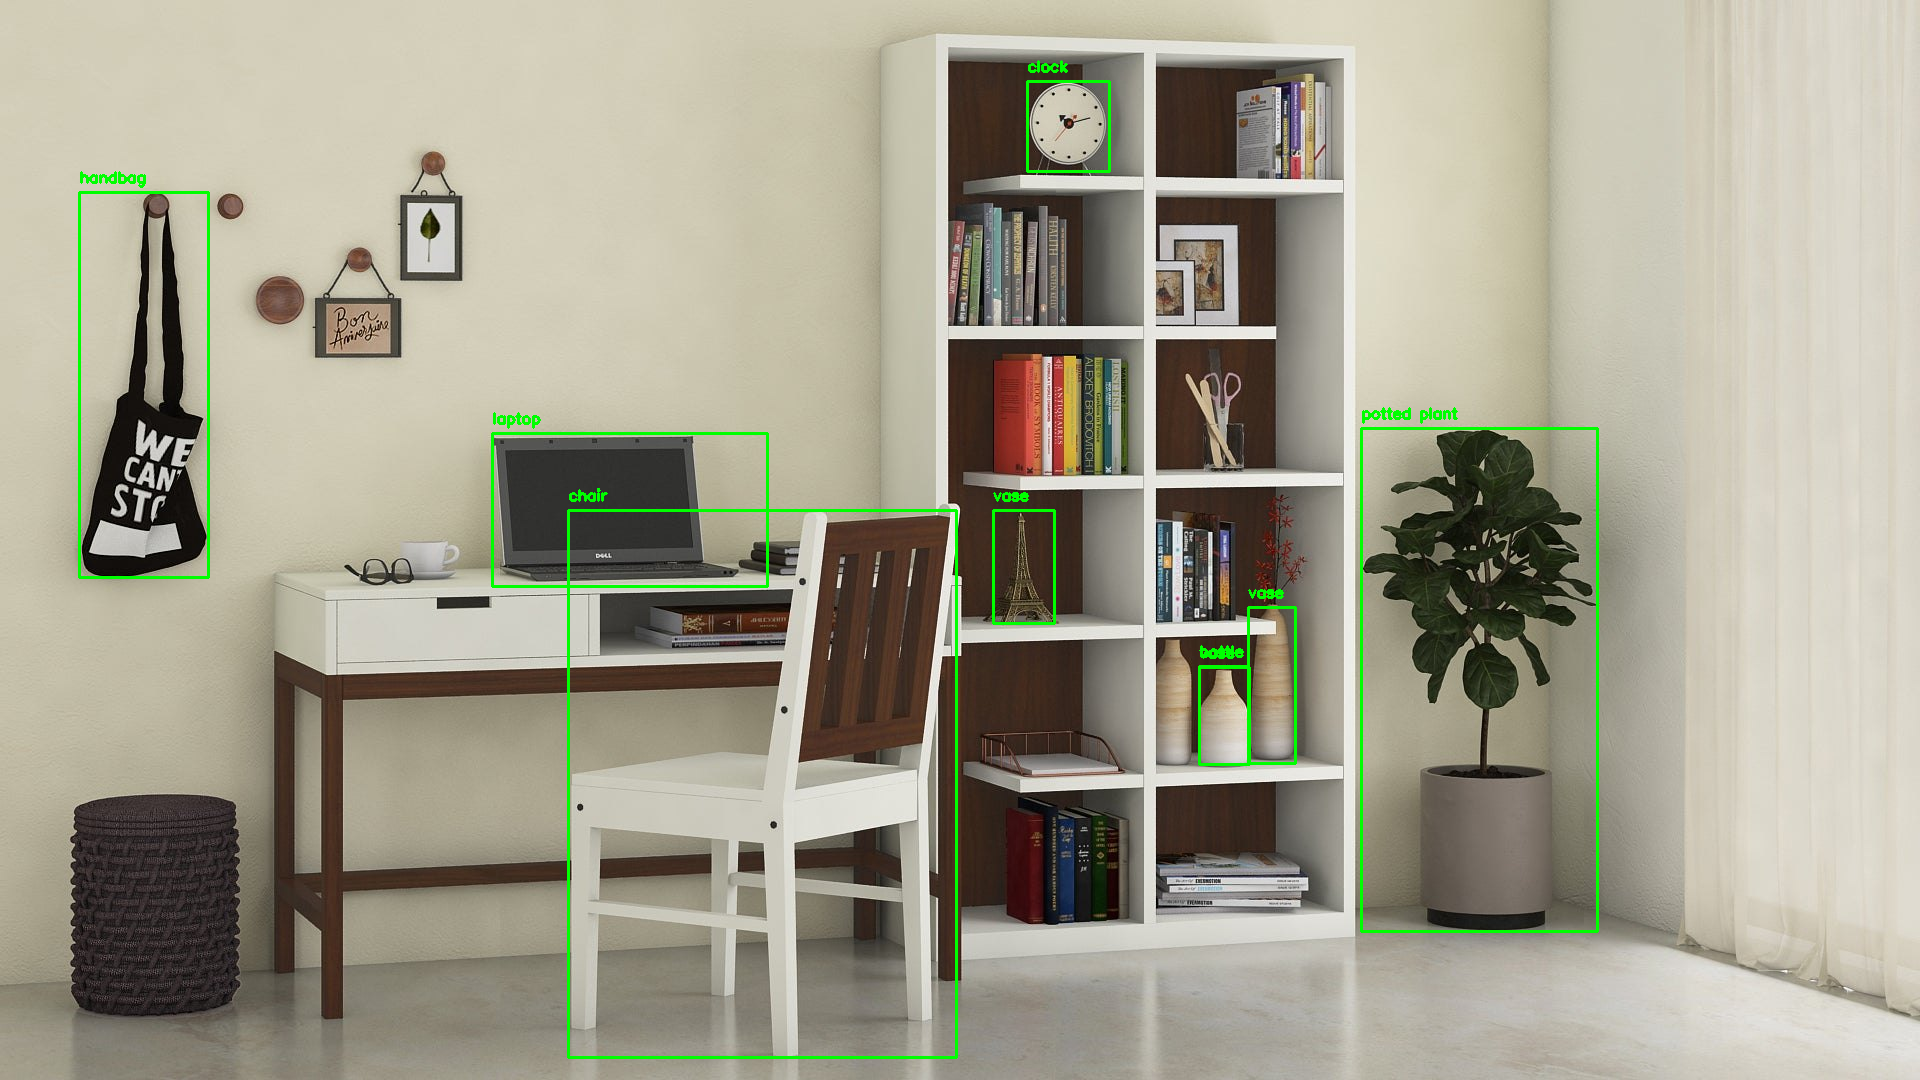

In [ ]:
from google.colab.patches import cv2_imshow
# Show image
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()